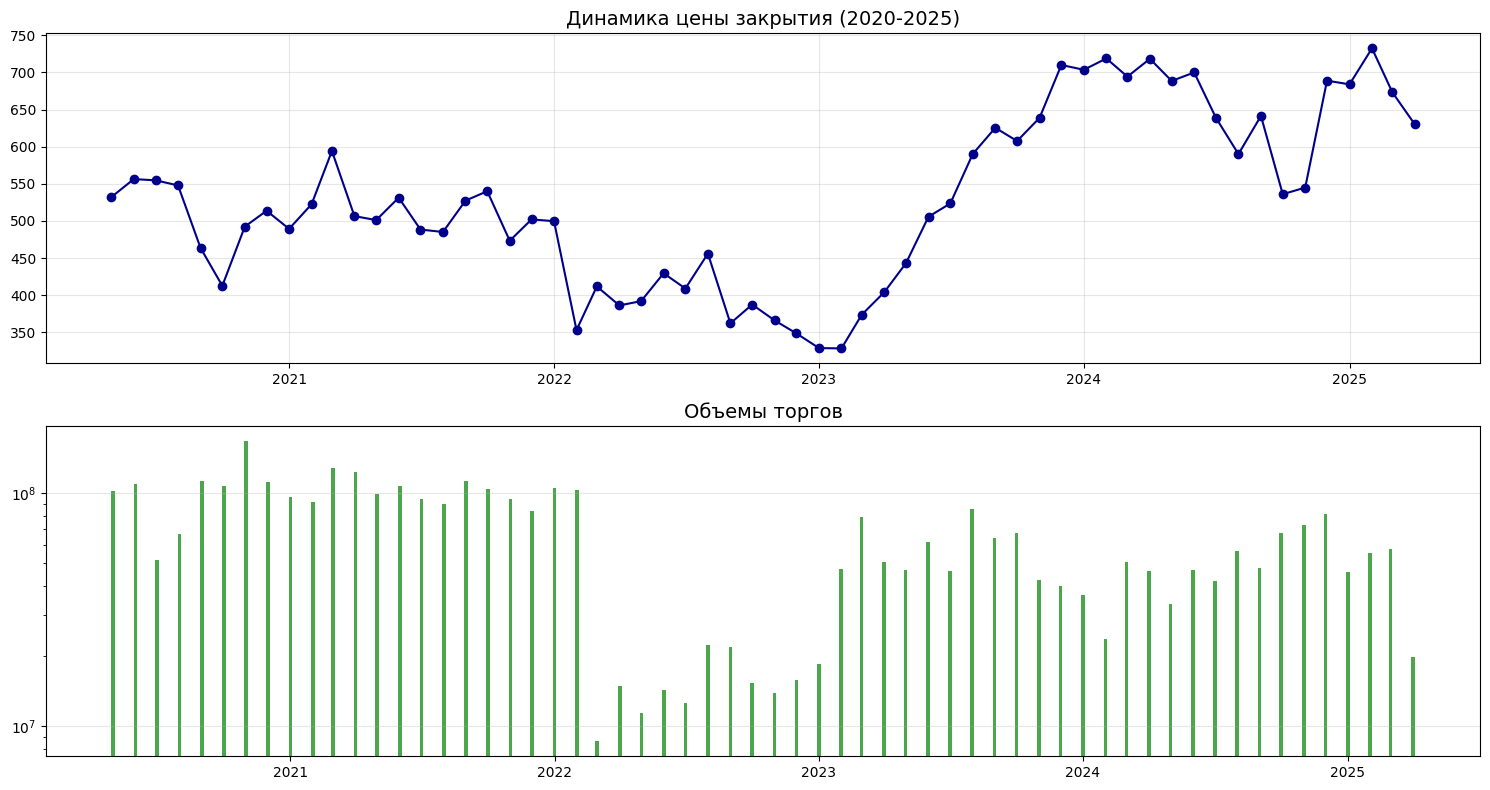

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

data = """TATN;M;200501;000000;540.6;575.4;508.2;532;102322400
TATN;M;200601;000000;544.2;599.4;501.2;556.3;109726710
TATN;M;200701;000000;562.4;579.8;534.2;554.7;51703369
TATN;M;200801;000000;552.7;616.4;541.5;547.8;66898697
TATN;M;200901;000000;549.9;557.5;448.7;463.6;112334256
TATN;M;201001;000000;465.6;486.7;395.5;412.6;107698947
TATN;M;201101;000000;409.6;541;404.3;492.3;166888406
TATN;M;201201;000000;494.1;527.2;485.3;513.7;111221919
TATN;M;210101;000000;516.3;558;488.8;489.3;95919106
TATN;M;210201;000000;492.7;547.3;486.3;522.5;91779769
TATN;M;210301;000000;527.3;633.9;524;594.2;128646972
TATN;M;210401;000000;597;608.3;498.9;506.5;123082351
TATN;M;210501;000000;508;520.5;479.2;501.1;98850612
TATN;M;210601;000000;504.4;547;502.6;531.3;107526747
TATN;M;210701;000000;533;551.7;473.7;488.4;94187953
TATN;M;210801;000000;490.4;516.6;482.5;485.1;89780562
TATN;M;210901;000000;486.9;546.6;474;527.3;112266699
TATN;M;211001;000000;524.9;587;522.8;540;103864862
TATN;M;211101;000000;540.2;561.4;458;473.3;94065533
TATN;M;211201;000000;476.4;505.9;427;502;83579876
TATN;M;220101;000000;504.9;518.2;436;499.7;105280434
TATN;M;220201;000000;500;509.8;232.9;353;102616170
TATN;M;220301;000000;390;442.8;361.8;411.8;8639192
TATN;M;220401;000000;413.6;434.8;319.5;386.2;14835824
TATN;M;220501;000000;386.5;413.5;351.8;392;11470886
TATN;M;220601;000000;388.4;458;372.3;429.5;14325067
TATN;M;220701;000000;421.1;439.9;366;409;12577041
TATN;M;220801;000000;408;461.9;383.1;456;22411893
TATN;M;220901;000000;455;461.1;335.5;362.1;21905537
TATN;M;221001;000000;363.6;393.7;300.1;387.4;15371157
TATN;M;221101;000000;387.8;397;360;366;13895066
TATN;M;221201;000000;365.6;367;346;348.5;15814607
TATN;M;230101;000000;350.4;352.3;326.7;328.8;18427948
TATN;M;230201;000000;328.6;330.7;310;328.3;47271403
TATN;M;230301;000000;328.1;379.4;325.1;373.7;78737562
TATN;M;230401;000000;383;418.6;376.2;404;50764186
TATN;M;230501;000000;405.4;448.4;379.5;443.2;46915542
TATN;M;230601;000000;444.5;521;443.9;505.7;61910496
TATN;M;230701;000000;505.9;525.5;475.2;523.5;46392484
TATN;M;230801;000000;525;598.2;518.7;590.2;85773649
TATN;M;230901;000000;591;630;583;625.4;64469904
TATN;M;231001;000000;627.9;650;602.5;607.6;67309976
TATN;M;231101;000000;609;649.9;595;638.8;42515032
TATN;M;231201;000000;638.8;720;615.2;710;40024701
TATN;M;240101;000000;714.7;729;685.1;703.5;36569355
TATN;M;240201;000000;704.6;722.9;681.1;718.8;23624056
TATN;M;240301;000000;718.8;756.4;679.1;694.3;50836707
TATN;M;240401;000000;696.5;740.9;696.5;718.3;46193237
TATN;M;240501;000000;718.5;752.1;688;688.5;33426585
TATN;M;240601;000000;688.3;712.5;642;699.9;46959161
TATN;M;240701;000000;701.2;715;627.6;638.8;42157712
TATN;M;240801;000000;638.5;641.5;577;590;56725125
TATN;M;240901;000000;588.8;650;555;641.4;47574206
TATN;M;241001;000000;642.5;665.1;530;536;67408138
TATN;M;241101;000000;536.7;604.5;498.1;544.9;73063166
TATN;M;241201;000000;545.1;695.7;520;688.9;81318407
TATN;M;250101;000000;693.2;694.3;631.4;683.9;45920391
TATN;M;250201;000000;683.9;769.8;674.5;732.4;55231734
TATN;M;250301;000000;732.7;739.2;661;673.3;57355485
TATN;M;250401;000000;673.5;678;581.5;630;19848741"""



df = pd.read_csv(
    StringIO(data),
    sep=';',
    header=None,
    names=['Ticker','Type','Date','Time','Open','High','Low','Close','Volume']
)

df['Date'] = pd.to_datetime(
    df['Date'].astype(str).str.zfill(6),
    format='%y%m%d',
    errors='coerce'
)


df = df[(df['Date'].dt.year >= 2020) & (df['Date'].dt.year <= 2025)]
plt.figure(figsize=(15, 8))

# График 1: Цена закрытия
plt.subplot(2, 1, 1)
plt.plot(df['Date'], df['Close'], marker='o', color='darkblue', linewidth=1.5)
plt.title('Динамика цены закрытия (2020-2025)', fontsize=14)
plt.grid(alpha=0.3)

# График 2: Объемы торгов
plt.subplot(2, 1, 2)
plt.bar(df['Date'], df['Volume'], color='green', alpha=0.7, width=5)
plt.title('Объемы торгов', fontsize=14)
plt.yscale('log')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

